In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import math
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from scipy import stats
from sklearn import tree  # Add this import statement
from sklearn import neighbors
from sklearn import ensemble
from sklearn import neural_network
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, ensemble, neural_network, naive_bayes
from IPython.display import HTML, display
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [ ]:

# Define a random state for reproducibility
rand = 42  # You can use any integer value here

# Example usage of DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(max_depth=7, random_state=rand)


# Reading Data from the file
data = pd.read_csv('/content/drive/My Drive/Explainable ML/aa-delays-2023.csv', sep=',')
print("data.info()\n", data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              2836 non-null   object 
 1   OP_CARRIER           2836 non-null   object 
 2   OP_CARRIER_FL_NUM    2836 non-null   int64  
 3   ORIGIN               2836 non-null   object 
 4   DEST                 2836 non-null   object 
 5   CRS_DEP_TIME         2836 non-null   int64  
 6   DEP_TIME             2836 non-null   float64
 7   DEP_DELAY            2836 non-null   float64
 8   TAXI_OUT             2836 non-null   float64
 9   WHEELS_OFF           2836 non-null   float64
 10  WHEELS_ON            2836 non-null   float64
 11  TAXI_IN              2836 non-null   float64
 12  CRS_ARR_TIME         2836 non-null   int64  
 13  ARR_TIME             2836 non-null   float64
 14  ARR_DELAY            2836 non-null   float64
 15  CANCELLED            2836 non-null   f

In [ ]:
print("data.head()\n", data.head(n=5))

data.head()
       FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2018-01-01         UA               2429    EWR  DEN          1517   
1  2018-01-01         UA               2427    LAS  SFO          1115   
2  2018-01-01         UA               2426    SNA  DEN          1335   
3  2018-01-01         UA               2425    RSW  ORD          1546   
4  2018-01-01         UA               2424    ORD  ALB           630   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1512.0       -5.0      15.0      1527.0  ...             268.0   
1    1107.0       -8.0      11.0      1118.0  ...              99.0   
2    1330.0       -5.0      15.0      1345.0  ...             134.0   
3    1552.0        6.0      19.0      1611.0  ...             190.0   
4     650.0       20.0      13.0       703.0  ...             112.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                250.0     225.0    1605.0   

In [ ]:
print(data.describe())

       OP_CARRIER_FL_NUM  CRS_DEP_TIME     DEP_TIME    DEP_DELAY     TAXI_OUT  \
count        2836.000000   2836.000000  2836.000000  2836.000000  2836.000000   
mean         1313.013399   1351.539845  1360.573343    13.105430    18.693935   
std          1170.045849    512.584993   526.264852    40.953268     9.815194   
min             1.000000     25.000000     0.000000   -30.000000     0.000000   
25%           434.000000    915.000000   926.000000    -5.000000    13.000000   
50%           788.500000   1335.000000  1344.500000    -1.000000    16.000000   
75%          1917.500000   1755.000000  1805.250000    12.000000    22.000000   
max          5001.000000   2359.000000  2359.000000   509.000000   112.000000   

        WHEELS_OFF    WHEELS_ON      TAXI_IN  CRS_ARR_TIME     ARR_TIME  ...  \
count  2836.000000  2836.000000  2836.000000   2836.000000  2836.000000  ...   
mean   1375.275740  1444.713329     7.903032   1473.804654  1446.156559  ...   
std     531.120962   578.65475

In [ ]:
# Whether arrival or destination is a hub
hubs = ['CLT', 'ORD', 'DFW', 'LAX', 'MIA', 'JFK', 'LGA', 'PHL', 'PHX', 'DCA']

# Check if 'ORIGIN' column exists before using it
if 'ORIGIN' in data.columns:
    is_origin_hub = data['ORIGIN'].isin(hubs)
    print("is_origin_hub\n", is_origin_hub)
    data['is_origin_h'] = is_origin_hub
    # Set Hubs
    data['ORIGIN_HUB'] = 0
    data.loc[is_origin_hub, 'ORIGIN_HUB'] = 1
else:
    print("'ORIGIN' column does not exist in the DataFrame.")

# Check if 'DEST' column exists before using it
if 'DEST' in data.columns:
    is_dest_hub = data['DEST'].isin(hubs)
    print("is_dest_hub\n", is_dest_hub)
    data['DEST_HUB'] = 0
    data.loc[is_dest_hub, 'DEST_HUB'] = 1
else:
    print("'DEST' column does not exist in the DataFrame.")

is_origin_hub
 0       False
1       False
2       False
3       False
4        True
        ...  
2831    False
2832    False
2833     True
2834    False
2835    False
Name: ORIGIN, Length: 2836, dtype: bool
is_dest_hub
 0       False
1       False
2       False
3        True
4       False
        ...  
2831    False
2832    False
2833    False
2834    False
2835    False
Name: DEST, Length: 2836, dtype: bool


In [ ]:
print("Target feature\n", data.loc[data['ARR_DELAY'] > 15, ['ARR_DELAY', 'DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY']].head(20))

Target feature
      ARR_DELAY  DEP_DELAY  CARRIER_DELAY  WEATHER_DELAY
11       129.0      121.0          121.0            0.0
14        73.0       76.0            0.0           11.0
15        55.0       54.0           54.0            0.0
16        25.0       72.0            7.0            0.0
17        29.0       47.0           29.0            0.0
27        27.0       48.0           27.0            0.0
56        26.0       41.0            0.0           26.0
61        75.0       94.0            0.0           18.0
63       124.0      134.0           12.0            0.0
66       291.0      299.0            0.0            0.0
73        28.0       -5.0            0.0            0.0
84        64.0       93.0           64.0            0.0
92        16.0       13.0           13.0            0.0
110       28.0       -5.0            0.0            0.0
111       72.0       82.0           13.0            0.0
113       30.0       45.0           30.0            0.0
122      117.0      144.0       

CARRIER_DELAY          1.000000
DEP_DELAY              0.610469
LATE_AIRCRAFT_DELAY    0.083087
NAS_DELAY              0.059318
TAXI_OUT               0.048693
WHEELS_OFF             0.044475
WEATHER_DELAY          0.040987
DEP_TIME               0.039465
TAXI_IN                0.033229
CRS_ARR_TIME           0.003227
SECURITY_DELAY         0.004670
WHEELS_ON              0.007985
ARR_TIME               0.011322
DEST_HUB               0.019840
CRS_DEP_TIME           0.022166
ACTUAL_ELAPSED_TIME    0.027090
is_origin_h            0.027286
ORIGIN_HUB             0.027286
AIR_TIME               0.035379
CRS_ELAPSED_TIME       0.036952
DISTANCE               0.042146
Name: CARRIER_DELAY, dtype: float64


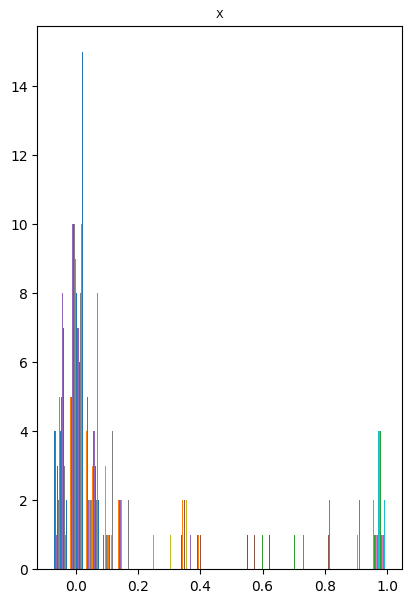

hist
 [[ 4.  9.  2.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  2.]
 [ 4.  5.  4.  0.  2.  0.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  2.]
 [ 4.  5.  5.  1.  2.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.
   0.  0.  1.]
 [ 5. 10.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 1. 10.  2.  0.  2.  0.  0.  0.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  2.  1.]
 [ 3. 10.  2.  0.  0.  0.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  2.]
 [ 3.  9.  2.  3.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 2. 10.  2.  1.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  2.
   0.  0.  1.]
 [ 3. 11.  1.  0.  0.  0.  0.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  2.]
 [ 5.  9.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  4.]
 [ 4.  8.  3.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  4.]
 [ 3. 10.  3.  

In [ ]:
y = data['CARRIER_DELAY']
X = data.copy()

X = X.drop(['ARR_DELAY', 'OP_CARRIER_FL_NUM', 'FL_DATE', 'ORIGIN', 'DEST', 'CANCELLATION_CODE', 'Unnamed: 27', 'CANCELLED', 'OP_CARRIER', 'DIVERTED'], axis=1)
# Splitting data into training and test data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.15, random_state=9)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Classification
y_train_class = y_train_reg.apply(lambda x: 1 if x > 15 else 0)
y_test_class = y_test_reg.apply(lambda x: 1 if x > 15 else 0)

# Correlation analysis on features in X_train
corr = X_train_scaled.corr()
print(abs(corr['CARRIER_DELAY'].sort_values(ascending=False)))

#est Normal Distribution with histogram

#X = np.array([0.1,0.1,0.1,1,1,1, 2,2,2,2,5,1,3,6,7,4,8])

fontsize = 8

fig = plt.figure(figsize=(16, 24))

ax1= fig.add_subplot (331)
ax1.set_title("X", fontsize=fontsize)

histo= plt.hist (corr, bins=len (corr)) #arguments are passed to me

ax1.plot()

plt.show()
print("hist\n", histo[0])

In [ ]:

#Normaldry

X = np.array([0.1,0.1,0.1,1,1,1, 2,2,2,2,5,1,3,6,7,4,8])
NormResult = stats.kstest (X, stats.norm.cdf)
print('NormResultin\n', NormResult)
trans = [lambda a: a,np.square, np.exp, np.cos, np.log]
dataset = pd.DataFrame({'X':X})

features = pd.concat([t(dataset) for t in trans], axis= 1)
print('feature\n', features)
# Rename column names
features.columns = ['X','square','exp','cos','log']
print('features\n',features)
NormResult = stats.kstest(features['log'], stats.norm.cdf)
print('NormResult\n', NormResult)

group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

stats.levene(group1, group2, group3, center = 'median')

varianceResult = stats.levene(group1, group2, group3, center = 'mean')
print("varianceresult\n", varianceResult)

data = {
    "A": ["Teama", "TeamB", "TeamB","teama", "teamd"],
    "B": [ 1,2,3,4,5],
    "C": [True, False,False,False,True]
}

df = pd.DataFrame(data)
print(df.drop_duplicates())

NormResultin
 KstestResult(statistic=0.6648741578332488, pvalue=6.3668502338112e-08, statistic_location=1.0, statistic_sign=-1)
feature
       X      X            X         X         X
0   0.1   0.01     1.105171  0.995004 -2.302585
1   0.1   0.01     1.105171  0.995004 -2.302585
2   0.1   0.01     1.105171  0.995004 -2.302585
3   1.0   1.00     2.718282  0.540302  0.000000
4   1.0   1.00     2.718282  0.540302  0.000000
5   1.0   1.00     2.718282  0.540302  0.000000
6   2.0   4.00     7.389056 -0.416147  0.693147
7   2.0   4.00     7.389056 -0.416147  0.693147
8   2.0   4.00     7.389056 -0.416147  0.693147
9   2.0   4.00     7.389056 -0.416147  0.693147
10  5.0  25.00   148.413159  0.283662  1.609438
11  1.0   1.00     2.718282  0.540302  0.000000
12  3.0   9.00    20.085537 -0.989992  1.098612
13  6.0  36.00   403.428793  0.960170  1.791759
14  7.0  49.00  1096.633158  0.753902  1.945910
15  4.0  16.00    54.598150 -0.653644  1.386294
16  8.0  64.00  2980.957987 -0.145500  2.079442

In [ ]:
# comparison of traditional regression models
reg_models = {
#Generalized Linear Models (GLMs)
'linear':{'model': linear_model.LinearRegression()},
'linear_poly':{'model': make_pipeline(PolynomialFeatures(degree=2),
linear_model.LinearRegression(fit_intercept=False)) },
'linear_interact':{'model': make_pipeline(PolynomialFeatures(interaction_only=True),
linear_model.LinearRegression(fit_intercept=False)) },
'ridge':{'model': linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]) },
#Trees
'decision_tree':{'model': tree.DecisionTreeRegressor(max_depth=7, random_state=rand)},
#Nearest Neighbors
'knn':{'model': neighbors.KNeighborsRegressor(n_neighbors=7)},
#Ensemble Methods
'random_forest':{'model':ensemble.RandomForestRegressor(max_depth=7, random_state=rand)},
#Neural Networks
'mlp':{'model':neural_network.MLPRegressor(hidden_layer_sizes=(21,), max_iter=500,early_stopping=True, random_state=rand)}}

In [ ]:
# Iteration over all models, fit to training data and predict
for model_name in reg_models.keys():
  fitted_model = reg_models[model_name]['model'].fit(X_train, y_train_reg)
  y_train_pred = fitted_model.predict(X_train)
  y_test_pred = fitted_model.predict(X_test)
  reg_models[model_name]['fitted'] = fitted_model
  reg_models[model_name]['preds'] = y_test_pred
  reg_models[model_name]['RMSE_train'] = math.sqrt(metrics.mean_squared_error(y_train_reg,
  y_train_pred))
  reg_models[model_name]['RMSE_test'] = math.sqrt(metrics.mean_squared_error(y_test_reg,
  y_test_pred))
  reg_models[model_name]['R2_test'] = metrics.r2_score(y_test_reg, y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# display metrics
reg_metrics = pd.DataFrame.from_dict(reg_models, 'index')[['RMSE_train', 'RMSE_test', 'R2_test']]
print("\nreg_metrics: \n",reg_metrics)


reg_metrics: 
                    RMSE_train     RMSE_test   R2_test
linear           6.565461e-14  9.690384e-14  1.000000
linear_poly      4.033089e-10  3.860870e-10  1.000000
linear_interact  4.954823e-10  5.536395e-10  1.000000
ridge            7.045990e-03  7.268549e-03  1.000000
decision_tree    9.350818e-02  2.122453e+00  0.993379
knn              1.556120e+01  1.903740e+01  0.467317
random_forest    1.980332e+00  5.025549e+00  0.962879
mlp              4.709361e+00  7.044143e+00  0.927069


In [ ]:
# Classification
class_models = {
#Generalized Linear Models (GLMs)
'logistic':{'model': linear_model.LogisticRegression()},
'ridge':{'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1],\
class_weight='balanced')},
#Tree
'decision_tree':{'model': tree.DecisionTreeClassifier(max_depth=7, random_state=rand)},
#Nearest Neighbors
'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)},
#Naive Bayes
'naive_bayes':{'model': naive_bayes.GaussianNB()},
#Ensemble Methods
'gradient_boosting':{'model':ensemble.GradientBoostingClassifier(n_estimators=210)},
'random_forest':{'model':ensemble.RandomForestClassifier(max_depth=11, class_weight='balanced',random_state=rand)},
#Neural Networks
'mlp':{'model':make_pipeline(StandardScaler(),\
neural_network.MLPClassifier(hidden_layer_sizes=(7,),
max_iter=500,\
early_stopping=True, random_state=rand))}
}

In [ ]:
for model_name in class_models.keys():
  fitted_model = class_models[model_name]['model'].fit(X_train, y_train_class)
  y_train_pred = fitted_model.predict(X_train.values)
  if model_name == 'ridge':
    y_test_pred = fitted_model.predict(X_test.values)
    y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
  else:
    y_test_prob = fitted_model.predict_proba(X_test.values)[:,1]
    y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
  class_models[model_name]['fitted'] = fitted_model
  class_models[model_name]['probs'] = y_test_prob
  class_models[model_name]['preds'] = y_test_pred
  class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train_class, y_train_pred)
  class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test_class, y_test_pred)
  class_models[model_name]['Recall_train'] = metrics.recall_score(y_train_class, y_train_pred)
  class_models[model_name]['Recall_test'] = metrics.recall_score(y_test_class, y_test_pred)
  if model_name != 'ridge':
    class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test_class, y_test_prob)
  else:
    class_models[model_name]['ROC_AUC_test'] = 0
  class_models[model_name]['F1_test'] = metrics.f1_score(y_test_class, y_test_pred)
  class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test_class, y_test_pred)
  class_models[model_name]['confusion_matrix'] = confusion_matrix(y_test_reg,y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeClassif

In [ ]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test', 'Recall_train', 'Recall_test', 'ROC_AUC_test', 'F1_test', 'MCC_test']]
print(class_metrics)

                   Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
logistic                 0.995021       0.992958      0.970443     1.000000   
ridge                    0.874689       0.880282      0.906404     0.966667   
decision_tree            1.000000       1.000000      1.000000     1.000000   
knn                      0.924481       0.934272      0.167488     0.200000   
naive_bayes              0.931535       0.941315      1.000000     1.000000   
gradient_boosting        1.000000       1.000000      1.000000     1.000000   
random_forest            1.000000       1.000000      1.000000     1.000000   
mlp                      0.948963       0.960094      0.571429     0.633333   

                   ROC_AUC_test   F1_test  MCC_test  
logistic               0.998401  0.952381  0.949844  
ridge                  0.000000  0.532110  0.553246  
decision_tree          1.000000  1.000000  1.000000  
knn                    0.771086  0.300000  0.320911  
naive_bayes       

In [ ]:
print("Confusion matrix " + model_name)
print(class_models[model_name]['confusion_matrix'])

Confusion matrix mlp
[[377   2   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   1   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]]


In [ ]:
plt.figure(figsize=(7, 7))
plt.tick_params(axis='both', which='major', labelsize=12)

# Use 'naive_bayes' instead of 'Naive_bayes'
fpr, tpr, _ = metrics.roc_curve(y_test_class, class_models['naive_bayes']['probs'])

plt.plot(fpr, tpr, label='Roc curve (area= %0.2f)' % class_models['naive_bayes']['ROC_AUC_test'])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

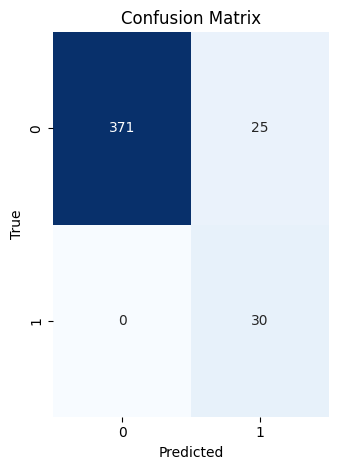

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
plt.subplot(1, 2, 2)
predicted_labels = np.where(class_models['naive_bayes']['probs'] > 0.5, 1, 0)  # Assuming threshold is 0.5

cm = confusion_matrix(y_test_class, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()
